In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from IPython.display import Image
from PIL import Image, ImageDraw, ImageFont
from sklearn.model_selection import train_test_split, cross_val_score,KFold
from sklearn.externals.six import StringIO
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error,accuracy_score
from subprocess import check_call
import os



In [7]:
os.chdir("F:\\DataScienceFull\\DataSet\\DataSets\\")

In [9]:
dataset=pd.read_csv("diabetes2.csv")

In [10]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
X=dataset.iloc[:,:-1]

In [14]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [15]:
y=dataset.iloc[:,-1]

In [17]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [19]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=25)

In [22]:
x_train.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
459,9,134,74,33,60,25.9,0.460,81
39,4,111,72,47,207,37.1,1.390,56
344,8,95,72,0,0,36.8,0.485,57
84,5,137,108,0,0,48.8,0.227,37
700,2,122,76,27,200,35.9,0.483,26


In [23]:
x_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
459,9,134,74,33,60,25.9,0.460,81
39,4,111,72,47,207,37.1,1.390,56
344,8,95,72,0,0,36.8,0.485,57
84,5,137,108,0,0,48.8,0.227,37
700,2,122,76,27,200,35.9,0.483,26


In [25]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [27]:
prediction = model.predict(x_test)
prediction


array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [40]:
cm_df = pd.DataFrame(confusion_matrix(y_test,prediction), index=model.classes_,
columns=model.classes_)
cm_df.columns.name = 'Predicted'
cm_df.index.name = 'Actual'
print(cm_df)

Predicted    0   1
Actual            
0          128  41
1           35  50


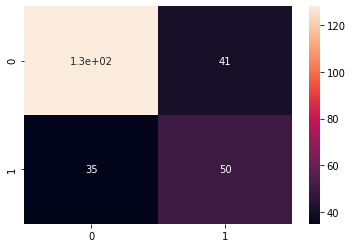

In [35]:
label = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label)


In [32]:
score=accuracy_score(y_test,prediction)

In [36]:
acc_decision_tree = round(score*100, 2)
acc_decision_tree


70.08

In [37]:
#Feature Importance DecisionTreeClassifier
importance =model.feature_importances_
importance

array([0.07981045, 0.36643563, 0.05711155, 0.02898009, 0.06821889,
       0.16106922, 0.14031463, 0.09805953])

In [55]:
indices = np.argsort(importance)[::-1]#do like thsi means most imp will come first
indices

array([1, 5, 6, 7, 0, 4, 2, 3], dtype=int64)

In [50]:
feature = dataset[dataset.columns[0:8]]
feature.shape

(768, 8)

In [49]:
feat_names = dataset.columns[0:8]
feat_names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [51]:
print("DecisionTree Feature ranking:")
for f in range(feature.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feat_names[indices[f]], importance[indices[f]]))


DecisionTree Feature ranking:
1. feature Glucose (0.366436)
2. feature BMI (0.161069)
3. feature DiabetesPedigreeFunction (0.140315)
4. feature Age (0.098060)
5. feature Pregnancies (0.079810)
6. feature Insulin (0.068219)
7. feature BloodPressure (0.057112)
8. feature SkinThickness (0.028980)


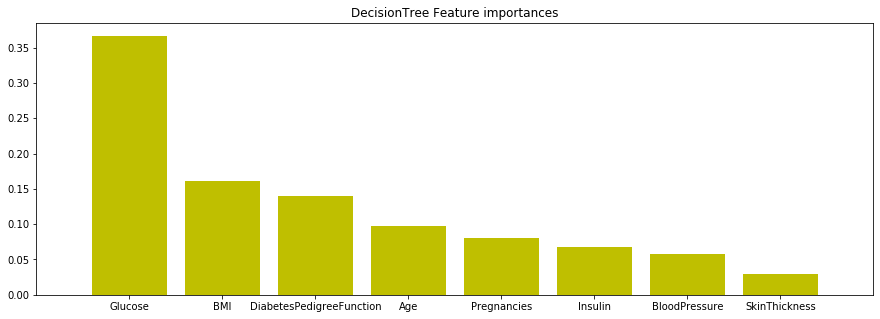

In [52]:
plt.figure(figsize=(15,5))
plt.bar(range(feature.shape[1]), importance[indices], color="y", align="center")
plt.title("DecisionTree Feature importances")
plt.xticks(range(feature.shape[1]), feat_names[indices])
plt.xlim([-1, feature.shape[1]])
plt.show()

# now check for diff diff depth

In [58]:
decision_tree =DecisionTreeClassifier(max_depth = 4)
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)

In [60]:
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [61]:
cm2=confusion_matrix(y_test,y_pred)

In [62]:
cm2

array([[129,  40],
       [ 24,  61]], dtype=int64)

In [65]:
accuracy=accuracy_score(y_test,y_pred)

In [67]:
round(accuracy*100,2)

74.8

In [68]:
decision_tree =DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)

In [69]:
cm3=confusion_matrix(y_test,y_pred)

In [70]:
cm3

array([[143,  26],
       [ 31,  54]], dtype=int64)

In [71]:
accuracy=round(accuracy_score(y_test,y_pred)*100,2)

In [72]:
accuracy

77.56

In [73]:
decision_tree =DecisionTreeClassifier(max_depth = 2)
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)

In [74]:
cm4=confusion_matrix(y_test,y_pred)

In [75]:
cm4

array([[163,   6],
       [ 63,  22]], dtype=int64)

In [76]:
accuracy=round(accuracy_score(y_test,y_pred)*100,2)

In [77]:
accuracy

72.83

# with diff diff feature

In [80]:
X = dataset.iloc[:,[1,5,6]] # ivs for train
y = dataset.iloc[:,8] # dv


In [81]:
X.head()

,Glucose,BMI,DiabetesPedigreeFunction
0,148,33.6,0.627
1,85,26.6,0.351
2,183,23.3,0.672
3,89,28.1,0.167
4,137,43.1,2.288


In [82]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [83]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)



In [106]:
model = DecisionTreeClassifier(max_depth=4)#you can try diff diff depth
model.fit(X_train,y_train)
prediction = model.predict(X_test)

In [107]:
cm5=confusion_matrix(y_test,prediction)

In [108]:
cm5

array([[144,  17],
       [ 58,  35]], dtype=int64)

In [109]:
accuracy=round(accuracy_score(y_test,prediction)*100,2)
accuracy

70.47

# by for loop

In [118]:
dataset.shape

(768, 9)

In [111]:
X=dataset.iloc[:,0:-1]

In [112]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [114]:
y=dataset.iloc[:,-1]

In [116]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [125]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)

In [128]:
accuracy=[]

In [129]:
for i in range(1,len(X.columns)+1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    y_pred=dt_classifier.predict(X_test)
    score=round(accuracy_score(y_test,y_pred)*100,2)
    accuracy.append(score)

In [130]:
accuracy

[72.44, 68.9, 64.57, 65.75, 70.47, 66.54, 70.47, 68.9]

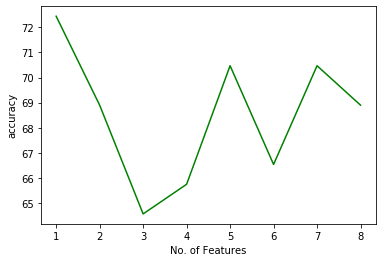

In [135]:
plt.plot([i for i in range(1, len(X.columns) + 1)], accuracy, color = 'green')
plt.xlabel("No. of Features")
plt.ylabel("accuracy")
plt.show()

In [138]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [144]:
fpr, tpr, th = roc_curve(y_test, y_pred)

In [145]:
fpr

array([0.  , 0.25, 1.  ])

In [146]:
tpr

array([0.        , 0.58510638, 1.        ])

In [147]:
th

array([2, 1, 0], dtype=int64)

In [142]:
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)

ROC AUC: 0.67


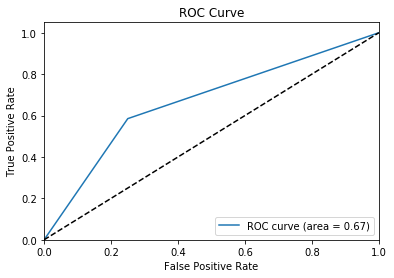

In [143]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [153]:
features=list(dataset.columns[1:])
features

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [164]:
import pydot
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image

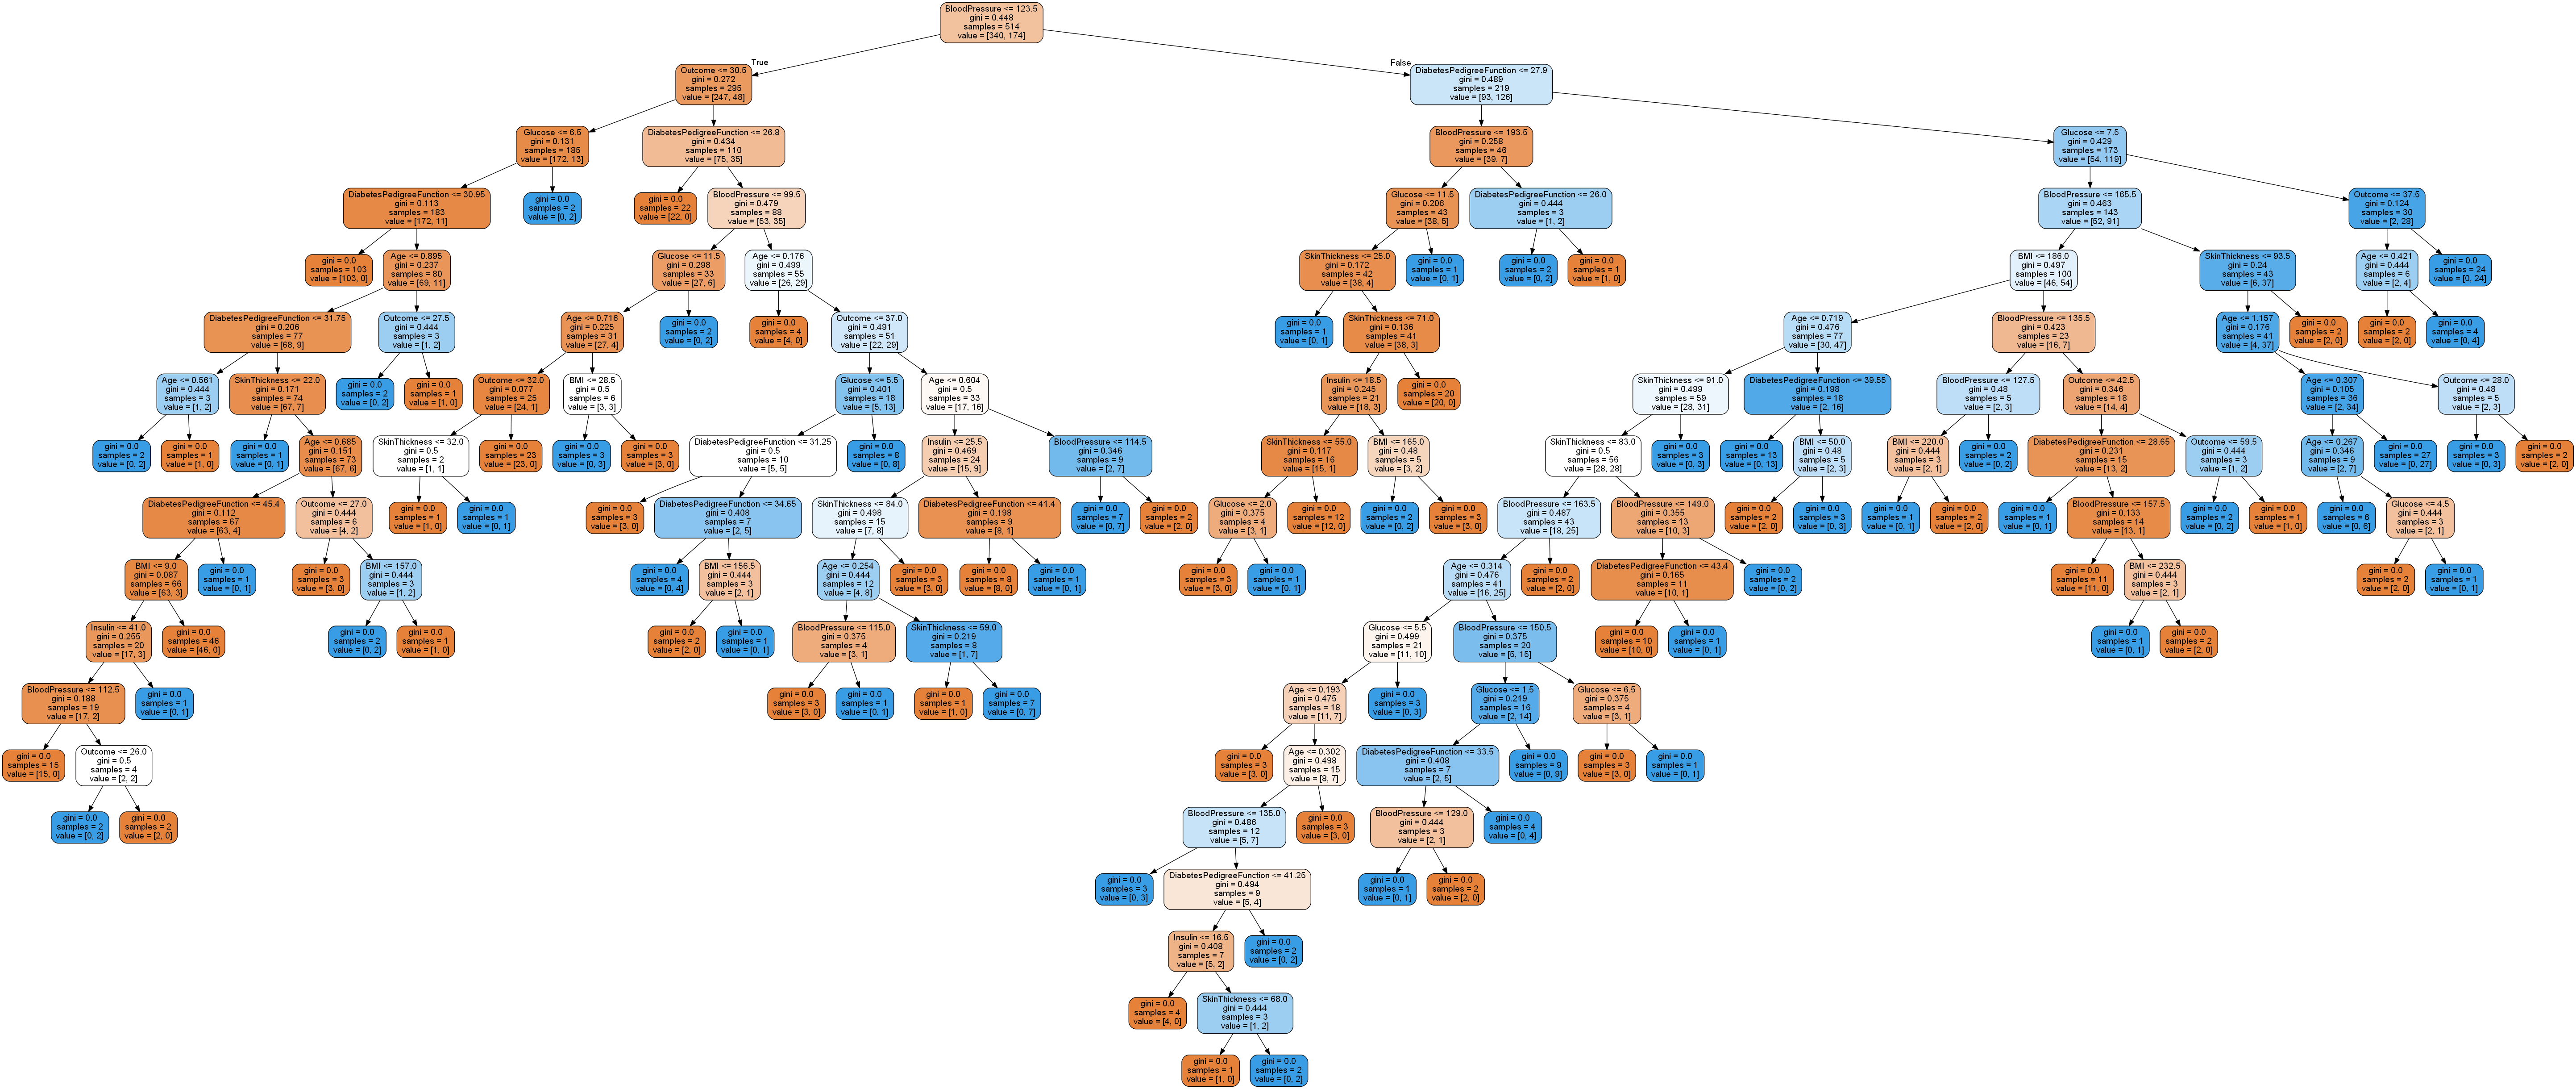

In [171]:
features=list(dataset.columns[1:])
features
dot_data=StringIO()
export_graphviz(dt_classifier,out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())




# gridsearch cv

In [172]:
from sklearn.model_selection import GridSearchCV

In [173]:
tuned_parameters = [{'max_depth': range(2,10),
'criterion': ['gini', 'entropy']}]

In [174]:
clf_tree = DecisionTreeClassifier()


In [175]:
clf = GridSearchCV(clf_tree,
tuned_parameters,
cv=5,
scoring='roc_auc')


In [178]:
clf.fit(X_train,y_train )


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             pre_disp

In [180]:
print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': 4}


In [184]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth= 4)

In [185]:
clf_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [188]:
pred=clf_tree.predict(X_test)

In [191]:
accuracy=accuracy_score(y_test,pred)
accuracy


0.6929133858267716

In [190]:
np.round(accuracy*100,2)

69.29